# **MPA-MLF Miniproject; Matyáš Sedláček**

## **0) Preparation:**

### Import libraries:

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LeakyReLU
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import Adamax
from keras.datasets import cifar10
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib

import numpy as np
import pandas as pd

from sklearn import preprocessing

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### Mount drive and get data:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
x_test = pd.read_csv('drive/MyDrive/MLFmini/x_test.csv')
x_train = pd.read_csv('drive/MyDrive/MLFmini/x_train.csv')
y_train = pd.read_csv('drive/MyDrive/MLFmini/y_train.csv')

## **1) Data examination:**

In [4]:
x_train.head(10)

,Unnamed: 0,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,m_power,ph_err,mag_err,evm,Tosc,Tmix
0,0,592.234802,0.048079,-35.082729,-28.560846,1.993170,-0.499721,1.107926,1.507550,2.423943,39.9,47.6
1,1,-103.302032,-0.019917,-29.946953,-35.798664,-3.642311,-0.928193,1.236059,2.741568,3.458056,14.8,23.1
2,2,-582.331299,0.036379,-32.096672,-31.905628,2.835839,-1.272485,1.282163,2.140096,3.013522,42.5,48.6
3,3,-630.611267,0.063928,-38.216297,-30.084171,1.346316,-0.596438,1.154848,1.093465,2.254514,26.1,35.4
4,4,-415.526978,-0.055761,-29.180740,-36.601025,-3.963526,0.113055,1.498889,3.608737,4.286684,24.2,40.8
5,5,-432.158600,-0.030759,-29.860676,-36.194633,-3.675441,0.243403,1.537498,3.449937,4.194931,27.5,44.8
6,6,-1121.172485,0.080203,-39.686409,-27.786304,1.063713,-0.111971,1.197557,0.900188,2.079625,56.8,64.1
7,7,-60.408207,0.097589,-31.729502,-29.707535,2.926517,-0.309486,1.300429,2.170298,3.130086,11.1,18.5
8,8,-162.684296,0.117599,-32.867283,-28.412897,2.533771,-0.761069,1.259792,1.939059,2.873458,47.9,55.0
9,9,-460.115356,0.097939,-38.504665,-30.381096,1.198071,-0.354572,1.201420,1.040533,2.311378,10.6,17.6


In [5]:
y_train.head(10)

,id,target
0,0,5
1,1,1
2,2,6
3,3,3
4,4,2
5,5,2
6,6,7
7,7,8
8,8,8
9,9,3


In [6]:
x_test.head(10)

,Unnamed: 0,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,m_power,ph_err,mag_err,evm,Tosc,Tmix
0,0,516.312866,0.055910,-34.748932,-28.086121,2.064618,-0.382014,1.166067,1.528550,2.541858,42.7,50.0
1,1,-452.875031,0.091061,-31.916044,-29.092400,2.843033,-0.585288,1.242625,2.044024,2.974349,28.8,37.3
2,2,543.581909,0.067271,-34.311523,-28.395725,2.160502,-0.272394,1.031588,1.615977,2.427548,29.3,37.8
3,3,-711.415710,0.001931,-30.205307,-35.895462,-3.537908,-1.061280,1.260278,2.586169,3.350533,31.9,42.6
4,4,-912.994873,0.054695,-31.485973,-33.110847,3.031799,-0.778807,1.343741,2.222488,3.199810,18.3,24.6
5,5,-127.396454,0.076116,-32.822315,-28.556459,2.569385,-0.805763,1.185854,1.946423,2.825569,43.0,50.4
6,6,-327.839325,0.079020,-35.681488,-29.708097,1.810301,-0.794000,1.250853,1.405979,2.601677,45.1,52.7
7,7,-284.483307,-0.026575,-30.071457,-35.786987,-3.588561,-0.890105,1.232498,2.697076,3.417039,19.1,28.1
8,8,-258.876770,-0.012376,-30.484192,-36.661945,-3.425236,-0.771317,1.153064,2.579239,3.210146,37.3,47.8
9,9,-342.999878,0.048045,-46.655155,-30.486408,0.428036,-0.289326,1.072514,0.623592,1.866601,1.4,9.4


According to the task specifications we need to drop the **m_power**, **Tosc** and **Tmix** columns. We can drop **Unnamed: 0** as well, since it's just the row indices. We will be left with eight columns/features to work with.

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15360 entries, 0 to 15359
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15360 non-null  int64  
 1   cfo_demod   15360 non-null  float64
 2   gain_imb    15360 non-null  float64
 3   iq_imb      15360 non-null  float64
 4   or_off      15360 non-null  float64
 5   quadr_err   15360 non-null  float64
 6   m_power     15360 non-null  float64
 7   ph_err      15360 non-null  float64
 8   mag_err     15360 non-null  float64
 9   evm         15360 non-null  float64
 10  Tosc        15360 non-null  float64
 11  Tmix        15360 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.4 MB


There's no missing values or NaN so we don't have to deal with that.

In [8]:
NumLabels = len(y_train['target'].unique())

In [9]:
y_train['target'].value_counts()

4    1949
2    1929
7    1920
6    1917
3    1916
1    1912
8    1910
5    1907
Name: target, dtype: int64

We will be classifying the data into 8 classes. We see that all are present in roughly the same amount, so no preprocessing is needed on this front.

In [10]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15360 entries, 0 to 15359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      15360 non-null  int64
 1   target  15360 non-null  int64
dtypes: int64(2)
memory usage: 240.1 KB


No missing values here as well.

## **2) Data preprocessing:**

###Removing unsuitable/redundant data:

In [11]:
dropXCols = ['Unnamed: 0', 'm_power', 'Tosc', 'Tmix']
dropYCols = 'id'
x_train = x_train.drop(dropXCols, axis=1)
x_test = x_test.drop(dropXCols, axis=1)
y_train = y_train.drop(dropYCols, axis=1)

### Applying value scaling:

In [12]:
#for training data
xScaler = preprocessing.MinMaxScaler()
x_trainCols = x_train.columns
x_trainVals = xScaler.fit_transform(x_train.values)
x_train = pd.DataFrame(x_trainVals, columns=x_trainCols)
x_train.head(10)

,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,0.930809,0.542445,0.760654,0.844057,0.824101,0.023830,0.109756,0.044470
1,0.599548,0.299964,0.945212,0.343402,0.088250,0.035936,0.230634,0.103537
2,0.371403,0.500723,0.867960,0.612692,0.934132,0.040292,0.171717,0.078146
3,0.348409,0.598966,0.648047,0.738686,0.739638,0.028263,0.069194,0.034793
4,0.450846,0.172137,0.972746,0.287901,0.046307,0.060769,0.315578,0.150866
5,0.442925,0.261300,0.948312,0.316012,0.083924,0.064417,0.300023,0.145626
6,0.114771,0.657005,0.595217,0.897634,0.702737,0.032298,0.050261,0.024804
7,0.619977,0.719003,0.881155,0.764738,0.945972,0.042018,0.174675,0.084804
8,0.571267,0.790362,0.840268,0.854291,0.894690,0.038179,0.152024,0.070146
9,0.429610,0.720252,0.637684,0.718147,0.720281,0.032663,0.064009,0.038041


In [13]:
#for testing data
x_testVals = xScaler.fit_transform(x_test.values)
x_test = pd.DataFrame(x_testVals, columns=x_trainCols)
x_test.head(10)

,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,0.900080,0.831951,0.767681,0.892258,0.840250,0.036315,0.179878,0.063664
1,0.430066,0.909459,0.871589,0.821504,0.942545,0.045914,0.261912,0.094728
2,0.913305,0.857002,0.783725,0.870489,0.852851,0.019454,0.193791,0.055454
3,0.304685,0.712926,0.934338,0.343164,0.103999,0.048127,0.348190,0.121748
4,0.206928,0.829272,0.887364,0.538957,0.967351,0.058592,0.290313,0.110922
5,0.587909,0.876505,0.838348,0.859187,0.906583,0.038796,0.246379,0.084042
6,0.490703,0.882909,0.733475,0.778213,0.806829,0.046945,0.160371,0.067961
7,0.511729,0.650070,0.939247,0.350791,0.097343,0.044644,0.365841,0.126525
8,0.524147,0.681379,0.924109,0.289271,0.118806,0.034685,0.347088,0.111665
9,0.483351,0.814607,0.330969,0.723488,0.625180,0.024586,0.035860,0.015163


In [14]:
# one-hot encoding for labels
y_train = y_train - 1 #solves out of bounds problems
y_train = to_categorical(y_train, num_classes = NumLabels)
y_train = pd.DataFrame(y_train)

# **3) Model building and training**

### Model:

In [15]:
model = Sequential()
model.add(Flatten(input_shape=(NumLabels, 1)))      
model.add(Dense(64, activation='gelu'))
model.add(Dense(NumLabels, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
Total params: 1,096
Trainable params: 1,096
Non-trainable params: 0
_________________________________________________________________


### Optimizer:

In [16]:
optimizer = SGD(learning_rate = 0.1)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model training:

In [17]:
history = model.fit(x_train, y_train, epochs=30, batch_size=40, validation_split = 0.2)

Epoch 1/30
308/308 [==============================] - 5s 8ms/step - loss: 1.4558 - accuracy: 0.6353 - val_loss: 0.8559 - val_accuracy: 0.7985
Epoch 2/30
308/308 [==============================] - 2s 6ms/step - loss: 0.5752 - accuracy: 0.9227 - val_loss: 0.3941 - val_accuracy: 0.9635
Epoch 3/30
308/308 [==============================] - 2s 6ms/step - loss: 0.3151 - accuracy: 0.9691 - val_loss: 0.2559 - val_accuracy: 0.9495
Epoch 4/30
308/308 [==============================] - 2s 5ms/step - loss: 0.2118 - accuracy: 0.9785 - val_loss: 0.1808 - val_accuracy: 0.9801
Epoch 5/30
308/308 [==============================] - 2s 6ms/step - loss: 0.1580 - accuracy: 0.9828 - val_loss: 0.1431 - val_accuracy: 0.9710
Epoch 6/30
308/308 [==============================] - 3s 8ms/step - loss: 0.1256 - accuracy: 0.9875 - val_loss: 0.1180 - val_accuracy: 0.9863
Epoch 7/30
308/308 [==============================] - 3s 10ms/step - loss: 0.1035 - accuracy: 0.9897 - val_loss: 0.0948 - val_accuracy: 0.9863
Epoch

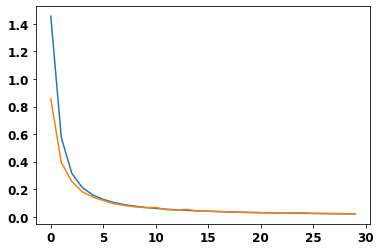

In [18]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

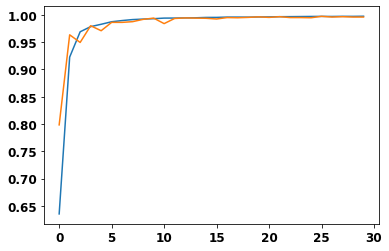

In [19]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [20]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.019851000979542732
Test accuracy: 99.72005486488342 %


# **4) Extract output for evaluation**

In [21]:
predictions = model.predict(x_test)
predictions = pd.DataFrame(predictions)
predictions = predictions.idxmax(axis=1)+1
predictions = pd.DataFrame(predictions, columns=['target'])
predictions.insert(0,'id',np.arange(len(predictions)))

120/120 [==============================] - 0s 2ms/step


### Save to *.csv file

In [23]:
predictions.to_csv('predictions.csv', index=False)